<a href="https://colab.research.google.com/github/Debmalya-prog/redshift_prediction/blob/main/redshift_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


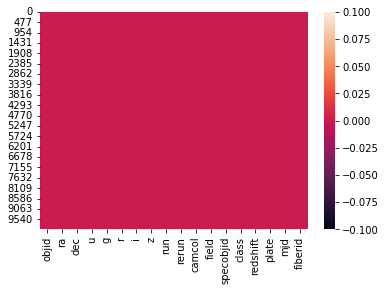

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull())
plt.show()


In [ ]:
df.drop(["objid",'specobjid','run','rerun','camcol','field','class'],inplace=True,axis=1)
df.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512


In [ ]:
y = df  ['redshift']
xc =df.drop(columns = ['redshift'])


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a=sc.fit_transform(xc)
df_xc = pd.DataFrame(a,columns=xc.columns)
df_xc.head()

,ra,dec,u,g,r,i,z,plate,mjd,fiberid
0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,1.031489,1.309311,0.668632
1,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.636213,-0.879197,0.911012
2,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.656339,-0.609191,0.775279
3,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,1.031489,1.309311,0.760736
4,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,1.031489,1.309311,0.770431


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  xc, y, test_size=0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(7000, 10)
(7000,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.073203113989345
Mean Squared Error: 0.055432144133809744
Root Mean Squared Error: 0.23544031968592327
